<a href="https://colab.research.google.com/github/chelsea118/-12-/blob/main/%E7%AC%AC12%E7%B5%84%E4%BD%9C%E6%A5%AD_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

組別：12
主題：Industry/Manufacturing
組員名單：
412351483,林子馨
410352110,林俐璿
412351029,傅語喬
412351184,周芛儀
412351304,吳儀玟


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/company_esg_financial_dataset.xlsx'

In [ ]:
Financial_Data = pd.read_excel(file_path, sheet_name='Financial_Data')
ESG_Score      = pd.read_excel(file_path, sheet_name='ESG_Score')
OTHERS         = pd.read_excel(file_path, sheet_name='OTHERS')

In [ ]:
Company_ESG = Financial_Data.merge(ESG_Score, on='CompanyID') \
                            .merge(OTHERS, on='CompanyID')

In [ ]:
Company_ESG.columns = [
    col[:-2] if (col.endswith('_x') or col.endswith('_y')) else col
    for col in Company_ESG.columns
]
Company_ESG = Company_ESG.loc[:, ~Company_ESG.columns.duplicated()]

In [ ]:
print(">>> 轉換前資料型態：")
Company_ESG.info()

Company_ESG['CompanyID']         = Company_ESG['CompanyID'].astype(str)
Company_ESG['Industry']          = Company_ESG['Industry'].astype('category')
Company_ESG['Region']            = Company_ESG['Region'].astype('category')
Company_ESG['Year']              = Company_ESG['Year'].astype(int)
Company_ESG['CarbonEmissions']   = Company_ESG['CarbonEmissions'].astype(float)
Company_ESG['WaterUsage']        = Company_ESG['WaterUsage'].astype(float)
Company_ESG['EnergyConsumption'] = Company_ESG['EnergyConsumption'].astype(float)

print("\n>>> 轉換後資料型態：")
Company_ESG.info()


>>> 轉換前資料型態：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          1000 non-null   int64  
 1   Industry           1000 non-null   object 
 2   Region             1000 non-null   object 
 3   Year               1000 non-null   int64  
 4   Revenue            1000 non-null   float64
 5   ProfitMargin       1000 non-null   float64
 6   MarketCap          1000 non-null   float64
 7   GrowthRate         1000 non-null   float64
 8   ESG_Overall        1000 non-null   float64
 9   ESG_Environmental  1000 non-null   float64
 10  ESG_Social         1000 non-null   float64
 11  ESG_Governance     1000 non-null   float64
 12  CarbonEmissions    1000 non-null   float64
 13  WaterUsage         1000 non-null   float64
 14  EnergyConsumption  1000 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 117.3+ KB


In [ ]:
Company_ESG = Company_ESG.drop(columns=['Year'])

In [ ]:
Company_ESG = Company_ESG.rename(columns={
    'CompanyID': 'ID',
    'CarbonEmissions': 'CO2排放量'
})
Company_ESG = Company_ESG.set_index('ID')

In [ ]:
Company_ESG = Company_ESG.sort_values(by='ESG_Overall', ascending=False)

In [ ]:
groups = []
for s in Company_ESG['ESG_Overall']:
    if s < 60:
        groups.append('低於60')
    elif s < 80:
        groups.append('60-80')
    else:
        groups.append('80以上')
Company_ESG['ESG成績分組'] = groups


In [ ]:
ESG_Manu = Company_ESG[Company_ESG['Industry'] == 'Manufacturing'][[
    'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
    'CO2排放量', 'WaterUsage', 'EnergyConsumption'
]].copy()

In [ ]:
stats_all     = ESG_Manu.agg(['mean', 'std']).T
median_energy = ESG_Manu['EnergyConsumption'].median()
cv_df         = (ESG_Manu.std() / ESG_Manu.mean()).to_frame(name='CV')

print("\n>>> 製造業子集各欄位平均數與標準差：")
print(stats_all)
print(f"\n>>> EnergyConsumption 中位數：{median_energy}")
print("\n>>> 製造業子集變異係數：")
print(cv_df)


>>> 製造業子集各欄位平均數與標準差：
                           mean           std
ESG_Overall        5.394444e+01  1.474982e+01
ESG_Environmental  4.698205e+01  2.200473e+01
ESG_Social         5.974530e+01  2.307601e+01
ESG_Governance     5.509573e+01  2.466661e+01
CO2排放量             7.703397e+05  1.079931e+06
WaterUsage         1.027120e+06  1.439909e+06
EnergyConsumption  1.283899e+07  1.799886e+07

>>> EnergyConsumption 中位數：7444564.7

>>> 製造業子集變異係數：
                         CV
ESG_Overall        0.273426
ESG_Environmental  0.468365
ESG_Social         0.386240
ESG_Governance     0.447705
CO2排放量             1.401890
WaterUsage         1.401890
EnergyConsumption  1.401890


In [ ]:
group_count = Company_ESG.groupby('ESG成績分組').size().to_frame('count')
group_max = Company_ESG.groupby('ESG成績分組').max(numeric_only=True)
group_min = Company_ESG.groupby('ESG成績分組').min(numeric_only=True)


print("\n>>> 各分組資料筆數：")
print(group_count)
print("\n>>> 各分組最大值：")
print(group_max)
print("\n>>> 各分組最小值：")
print(group_min)


>>> 各分組資料筆數：
         count
ESG成績分組       
60-80      379
80以上        79
低於60       542

>>> 各分組最大值：
          Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  \
ESG成績分組                                                               
60-80    144823.6          50.0   821387.0        31.1         79.9   
80以上     134253.3          36.6   490286.1        22.0         98.0   
低於60     180810.4          50.0   578679.3        37.5         59.8   

         ESG_Environmental  ESG_Social  ESG_Governance       CO2排放量  \
ESG成績分組                                                               
60-80                100.0       100.0           100.0   51147462.4   
80以上                 100.0       100.0           100.0  108229578.1   
低於60                 100.0       100.0            96.9  174104721.4   

         WaterUsage  EnergyConsumption  
ESG成績分組                                 
60-80    15344238.7       5.114746e+08  
80以上     32468873.4       1.082296e+09  
低於60     52231416.4   

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas

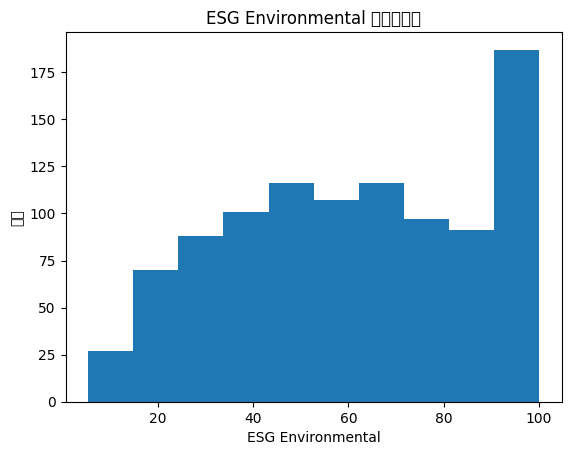

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30418 (\N{CJK UNIFIED IDEOGRAPH-76D2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  fig.canvas

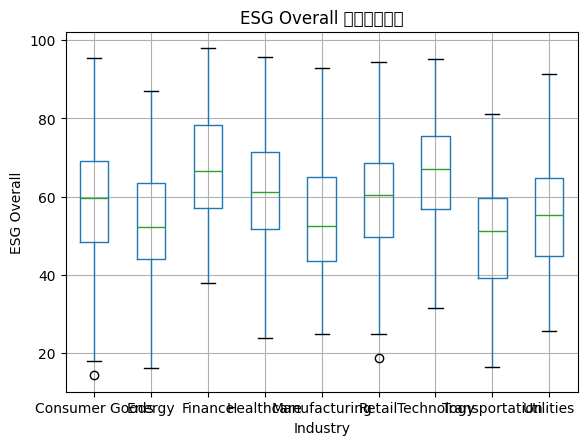

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32318 (\N{CJK UNIFIED IDEOGRAPH-7E3E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas

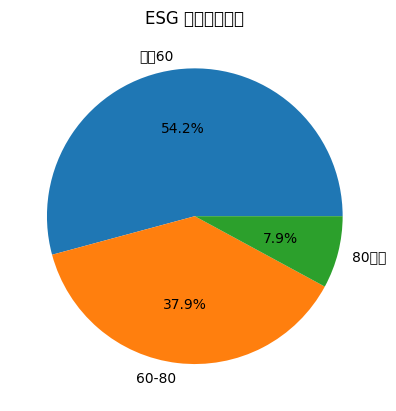

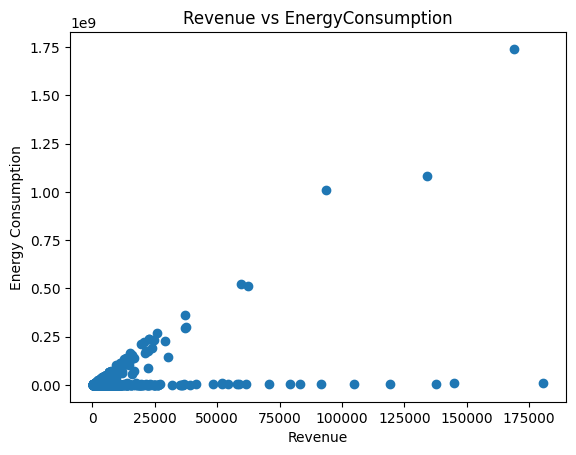

In [ ]:
plt.figure()
plt.hist(Company_ESG['ESG_Environmental'].dropna())
plt.title('ESG Environmental 分佈直方圖')
plt.xlabel('ESG Environmental')
plt.ylabel('頻次')
plt.show()

plt.figure()
Company_ESG.boxplot(column='ESG_Overall', by='Industry')
plt.title('ESG Overall 各產業盒形圖')
plt.suptitle('')
plt.xlabel('Industry')
plt.ylabel('ESG Overall')
plt.show()

plt.figure()
counts = Company_ESG['ESG成績分組'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('ESG 成績分組分佈')
plt.show()

plt.figure()
plt.scatter(Company_ESG['Revenue'], Company_ESG['EnergyConsumption'])
plt.title('Revenue vs EnergyConsumption')
plt.xlabel('Revenue')
plt.ylabel('Energy Consumption')
plt.show()